# Car Prices Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

In [3]:
cars = pd.read_csv ('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# (1) Cleaning data

In [6]:
cars['CarName']=cars['CarName'].apply(lambda x:x.split(' ', 1)[0]) #Function is important
cars.rename(columns = {'CarName':'CompanyName'}, inplace = True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# (2) Encoding Categorical data (Replacing Values)

In [7]:
cleanup_nums = {"doornumber": {"four": 4, "two": 2}}            
cars=cars.replace(cleanup_nums)
cars.head()

C:\Users\imdsk\AppData\Local\Temp\ipykernel_7104\1979668439.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars=cars.replace(cleanup_nums)


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
cars.isna().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    # cars.CompanyName.replace(a,b,inplace=True)
    cars.replace({'CompanyName': {a: b}}, inplace=True)


replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Visualizing data

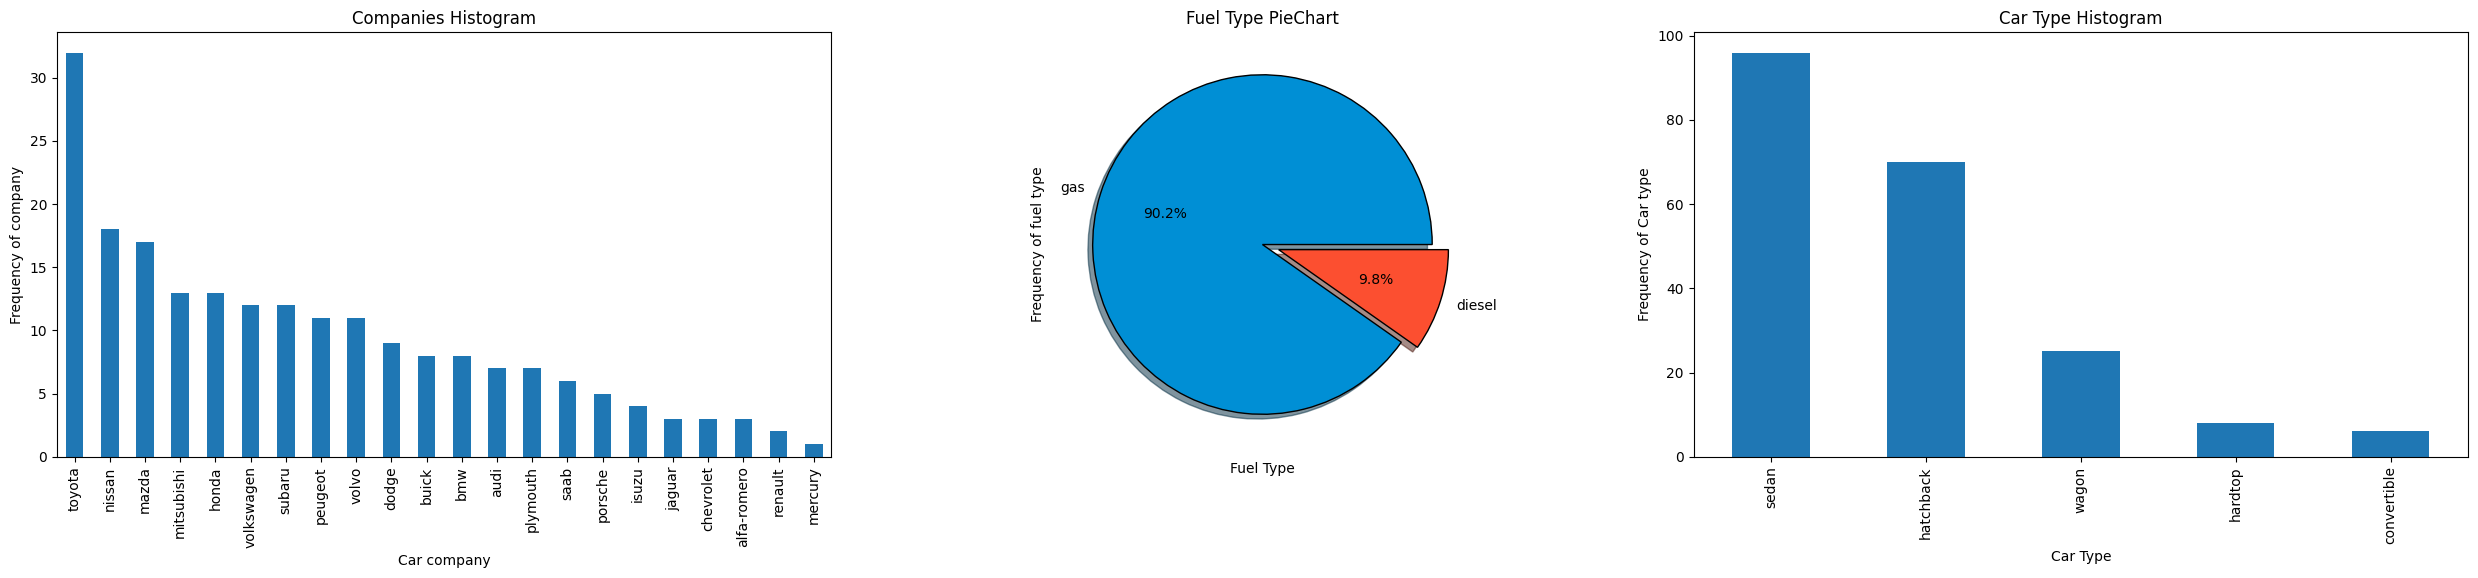

In [12]:
plt.figure(figsize=(25, 6))


explode=[0,0.1]

colors = ['#008fd5','#fc4f30']


plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow = True ,explode=explode ,colors=colors ,wedgeprops={'edgecolor':'black'})
plt.title('Fuel Type PieChart')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')




plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.xkcd()

plt.show()

In [13]:
#Toyota seemed to be favored car company.
#Number of gas fueled cars are more than diesel.
#sedan is the top car type prefered.

In [14]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Linear Regression

In [16]:
x = cars.loc[:101,["symboling"]]
y = cars.loc[:101,["price"]]

x_test = cars.loc[102:,["symboling"]]
y_actual = cars.loc[102:,["price"]]

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
LinearRegression()

y_predicted = model.predict(x_test)
y_predicted

array([[15874.62088145],
       [15874.62088145],
       [ 9293.07976059],
       [ 9293.07976059],
       [13680.77384116],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [13680.77384116],
       [13680.77384116],
       [13680.77384116],
       [13680.77384116],
       [13680.77384116],
       [18068.46792174],
       [ 9293.07976059],
       [ 9293.07976059],
       [ 9293.07976059],
       [ 9293.07976059],
       [ 9293.07976059],
       [13680.77384116],
       [15874.62088145],
       [11486.92680088],
       [ 9293.07976059],
       [11486.92680088],
       [ 9293.07976059],
       [11486.92680088],
       [ 9293.07976059],
       [11486.92680088],
       [11486.92680088],
       [11486.92680088],
       [11486.92680088],
       [15874.62088145],


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

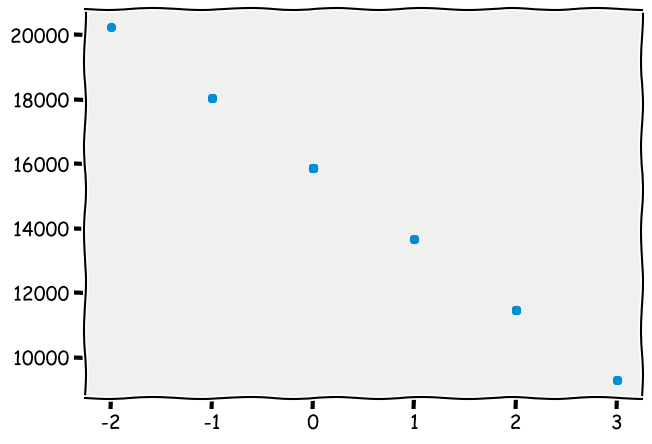

In [46]:
plt.scatter(x_test,y_predicted)
plt.show()

In [18]:
model.coef_

array([[-2193.84704029]])

In [19]:
model.intercept_

array([15874.62088145])

# Multi

In [20]:
#Variables for prediction of price

auto = cars[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price']]
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0


# Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [21]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)

drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], axis = 1, inplace = True)

In [22]:
xx=auto
yy=cars.price

from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size=.3)
xx_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,five,four,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
11,101.2,176.8,64.8,2395,108,3.50,101,16925.0,False,True,...,False,False,False,True,False,False,True,False,False,True
125,94.5,168.9,68.3,2778,151,3.94,143,22018.0,False,True,...,False,False,False,True,False,True,False,False,False,True
135,99.1,186.6,66.5,2758,121,3.54,110,15510.0,False,True,...,False,False,True,False,False,False,True,False,False,True
189,94.5,159.3,64.2,2254,109,3.19,90,11595.0,False,True,...,False,False,True,False,False,False,False,False,False,True
136,99.1,186.6,66.5,2808,121,3.54,160,18150.0,False,True,...,False,False,True,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,93.7,157.3,64.4,1944,92,2.97,68,6189.0,False,True,...,False,False,True,False,False,True,False,False,False,True
78,93.7,157.3,64.4,2004,92,2.97,68,6669.0,False,True,...,False,False,True,False,False,True,False,False,False,True
50,93.1,159.1,64.2,1890,91,3.03,68,5195.0,False,True,...,False,False,True,False,False,True,False,False,False,True
57,95.3,169.0,65.7,2385,70,3.33,101,13645.0,False,False,...,False,True,False,True,False,True,False,False,False,True


In [23]:
yy_train

11     16925.0
125    22018.0
135    15510.0
189    11595.0
136    18150.0
        ...   
77      6189.0
78      6669.0
50      5195.0
57     13645.0
129    31400.5
Name: price, Length: 143, dtype: float64

In [24]:
# plt.rcParams['font.family'] = 'DejaVu Sans'

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

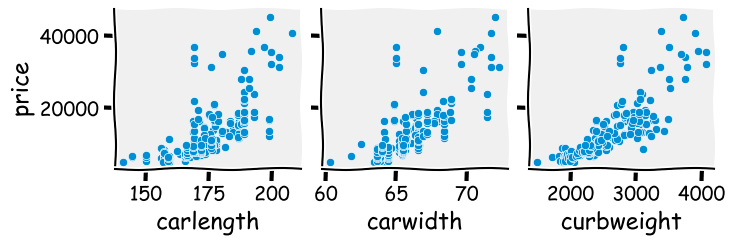

In [25]:
sns.pairplot(auto, x_vars=["carlength","carwidth","curbweight"],y_vars=["price"], diag_kind=None)

In [26]:
#import statsmodels.formula.api as sm 
#lr=sm.ols(formula = 'price ~ fuelt+asp+carb+drwh+wheelbase+carlength+carwidth+curbweight+eng_typ+cyl_no+enginesize+boreratio+horsepower', data=auto).fit()

# FeatureScaling

In [27]:
xxx = auto
yyy = cars.price

In [28]:
from sklearn.model_selection import train_test_split
xxx_train, xxx_test, yyy_train, yyy_test = train_test_split(xxx,yyy,test_size=.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xxx_train_scale = sc.fit_transform(xxx_train)
xxx_test_scale = sc.transform(xxx_train)
xxx_test_scale

array([[-0.49882393, -0.64269249, -0.75890752, ..., -0.3423266 ,
        -0.46028731, -2.81735692],
       [ 1.59516512,  1.02845692,  1.10231818, ..., -0.3423266 ,
         2.1725561 ,  0.3549426 ],
       [ 1.78243244,  1.20048701,  1.3886606 , ..., -0.3423266 ,
        -0.46028731,  0.3549426 ],
       ...,
       [-0.22643511, -0.20032941, -0.23394643, ..., -0.3423266 ,
        -0.46028731,  0.3549426 ],
       [-0.49882393, -0.64269249, -0.75890752, ..., -0.3423266 ,
        -0.46028731,  0.3549426 ],
       [-0.94145576, -1.23250993, -0.85435499, ..., -0.3423266 ,
        -0.46028731,  0.3549426 ]])

In [29]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=4)
#model.fit(xxx_train_scale,yyy_train)
#KNeighborsClassifier()
#yyy_predict = model.predict(xxx_test_scale)
#yyy_predict

In [30]:
#z = auto
#c = cars.price
#from sklearn.model_selection import train_test_split
#z_train, z_test, c_train, c_test = train_test_split(z,c,test_size=.3)
#from sklearn.naive_bayes import GaussianNB
#GNB = GaussianNB()
#GNB.fit(z_train, c_train)
#GaussianNB()

In [31]:
#from sklearn.preprocessing import MinMaxScaler

In [32]:
#MNS = MinMaxScaler()
#xxx_train_MN= MNS.fit_transform(xxx_train)
#xxx_train_MN

# Before Creatig Elbow Plot

In [33]:
NewCars = cars[['CompanyName','citympg','price']]
NewCars.head()

,CompanyName,citympg,price
0,alfa-romero,21,13495.0
1,alfa-romero,21,16500.0
2,alfa-romero,19,16500.0
3,audi,24,13950.0
4,audi,18,17450.0


In [34]:
Q = NewCars.iloc[:,[1,2]]
Q.head()

,citympg,price
0,21,13495.0
1,21,16500.0
2,19,16500.0
3,24,13950.0
4,18,17450.0


In [35]:
W = NewCars.iloc[:,0]
W.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CompanyName, dtype: object

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

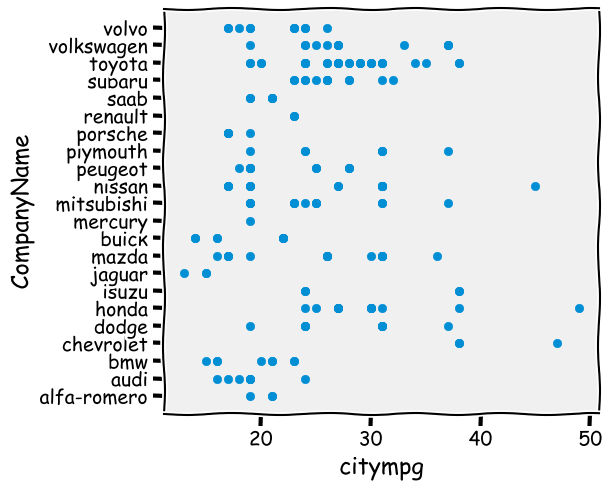

In [36]:
plt.figure(figsize =(5,5))
plt.scatter(cars.citympg,cars.CompanyName)
plt.xlabel('citympg')
plt.ylabel('CompanyName')
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

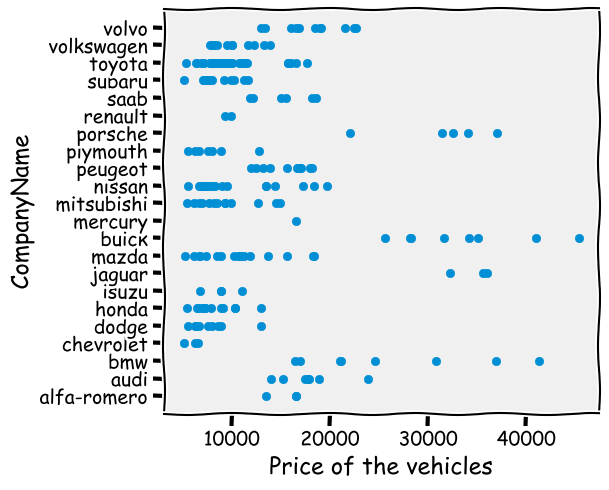

In [37]:
plt.figure(figsize =(5,5))
plt.scatter(cars.price,cars.CompanyName)
plt.xlabel('Price of the vehicles')
plt.ylabel('CompanyName')
plt.show()

# Scaling using standarization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Q)
scaled_Q = pd.DataFrame(scaler.transform(Q), columns= Q.columns)
scaled_Q

,citympg,price
0,-0.646553,0.027391
1,-0.646553,0.404461
2,-0.953012,0.404461
3,-0.186865,0.084485
4,-1.106241,0.523668
...,...,...
200,-0.340094,0.447752
201,-0.953012,0.723810
202,-1.106241,1.029983
203,0.119594,1.153582


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

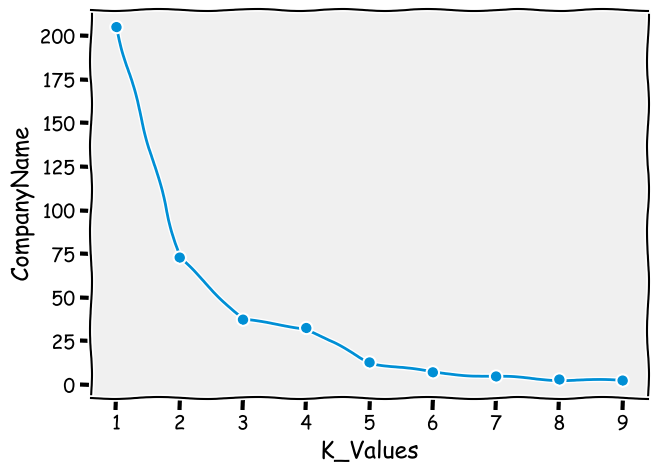

In [39]:
k_rng = range(1,10)
sse1 = []  #the sum of the squared Euclidean distances of each point to its closest centroid.
for k1 in k_rng:
    km1 = KMeans(n_clusters = k1)
    km1.fit(scaled_Q[['citympg']])
    sse1.append(km1.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('CompanyName')
plt.plot(k_rng, sse1, marker = 'o')
plt.show()

In [40]:
#The optimum value for K in citympg attribute is 3

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

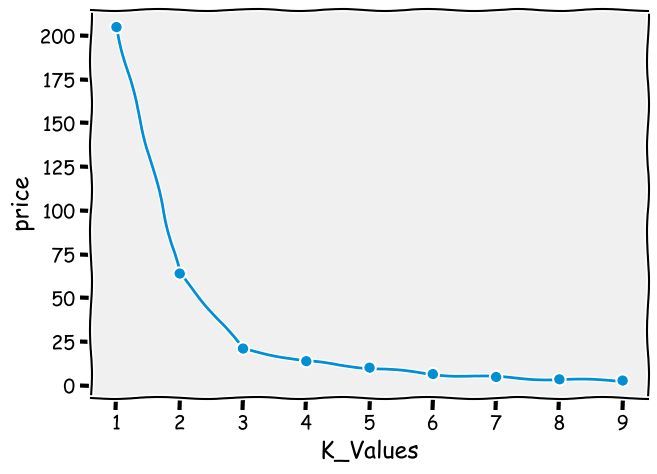

In [41]:
k_rng = range(1,10)
sse2 = []  
for k2 in k_rng:
    km2 = KMeans(n_clusters = k2)
    km2.fit(scaled_Q[['price']])
    sse2.append(km2.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('price')
plt.plot(k_rng, sse2, marker = 'o')
plt.show()

In [42]:
#The optimum value for K in price attribute is 3

# (Applying Clustering Algorithm)
I wanna find out which company should we go for, in terms of its price & citympg

In [43]:
#As the optimum value for K=3 for both attributes >> Create 3 clusters of classification.
km1 = KMeans(n_clusters=3)
km1.fit(scaled_Q[['citympg']])
W_predict = km1.predict(scaled_Q[['citympg']])
MC_cars = pd.concat([scaled_Q['citympg'],cars.CompanyName], axis=1)
MC_cars['Cluster(CompanyName vs citympg)'] = W_predict
MC_cars

,citympg,CompanyName,Cluster(CompanyName vs citympg)
0,-0.646553,alfa-romero,0
1,-0.646553,alfa-romero,0
2,-0.953012,alfa-romero,0
3,-0.186865,audi,2
4,-1.106241,audi,0
...,...,...,...
200,-0.340094,volvo,2
201,-0.953012,volvo,0
202,-1.106241,volvo,0
203,0.119594,volvo,2


Text(0, 0.5, 'CompanyName')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

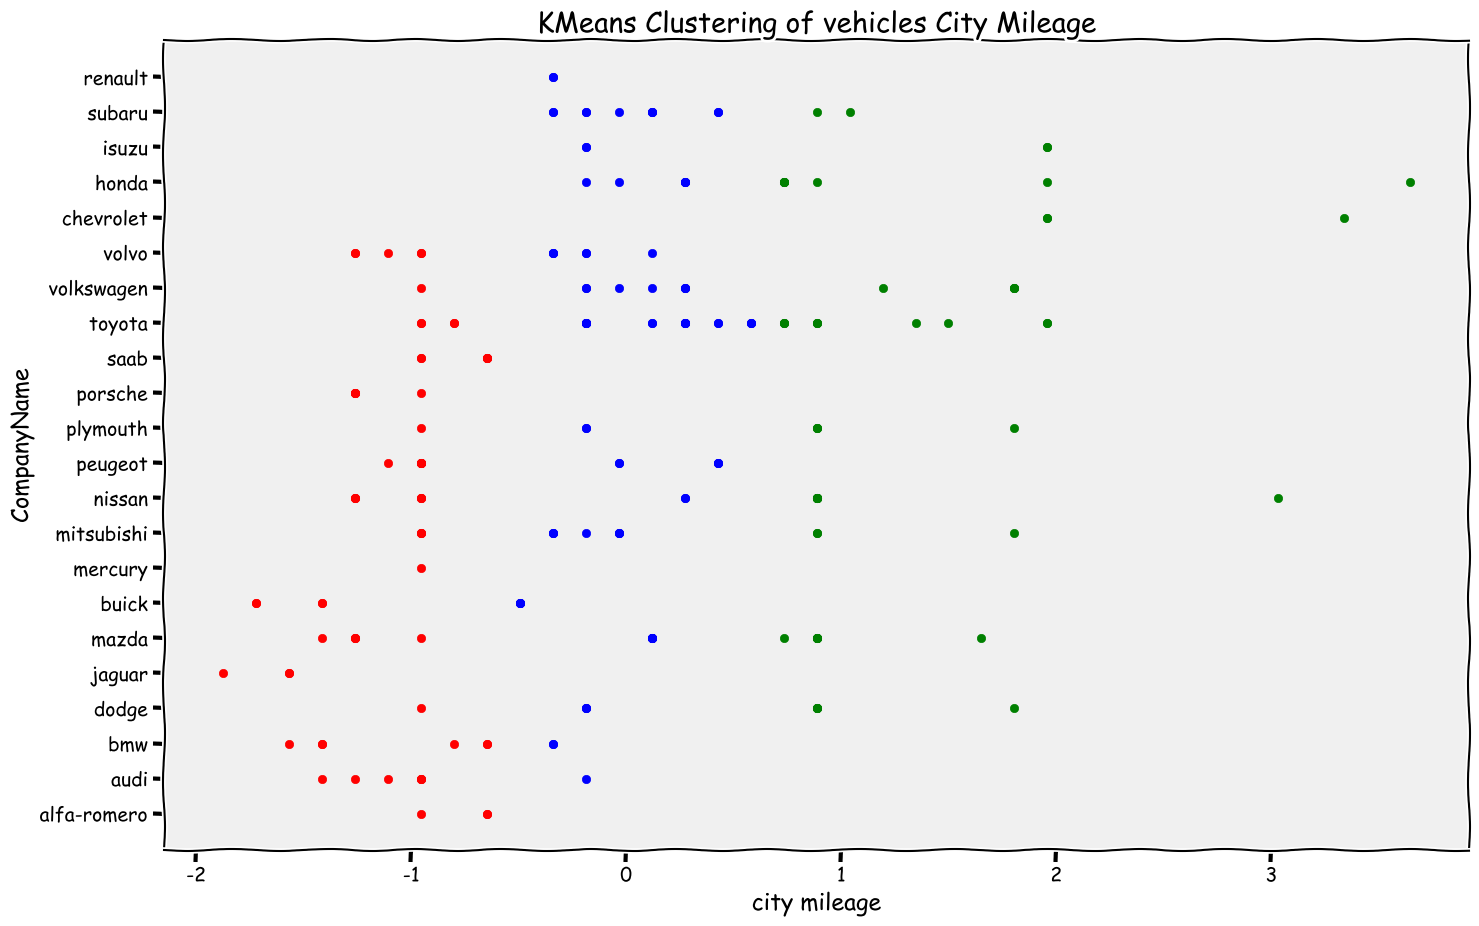

In [44]:
MC_cars1 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 0]
MC_cars2 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 1]
MC_cars3 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 2]

plt.subplots(figsize=([15,10]))
plt.scatter(MC_cars1['citympg'],MC_cars1['CompanyName'], color='red')
plt.scatter(MC_cars2['citympg'],MC_cars2['CompanyName'], color='green')
plt.scatter(MC_cars3['citympg'],MC_cars3['CompanyName'], color='blue')

plt.title('KMeans Clustering of vehicles City Mileage')
plt.xlabel('city mileage')
plt.ylabel('CompanyName')

In [45]:
#KMeans for price & CompanyName
km2 = KMeans(n_clusters=3)
km2.fit(scaled_Q[['citympg']])
W_predict = km1.predict(scaled_Q[['price']])
MC_cars = pd.concat([scaled_Q['price'],cars.CompanyName], axis=1)
MC_cars['Cluster(CompanyName vs citympg)'] = W_predict
MC_cars

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- citympg


In [ ]:
MC_cars1 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 0]
MC_cars2 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 1]
MC_cars3 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 2]

plt.subplots(figsize=([15,10]))
plt.scatter(MC_cars1['price'],MC_cars1['CompanyName'], color='red')
plt.scatter(MC_cars2['price'],MC_cars2['CompanyName'], color='green')
plt.scatter(MC_cars3['price'],MC_cars3['CompanyName'], color='blue')

plt.title('KMeans Clustering of Price')
plt.xlabel('Price')
plt.ylabel('CompanyName')

# Creating Dendrogram

In [ ]:
plt.figure(figsize = (15,15))
import scipy.cluster.hierarchy as sch
dendrograms = sch.dendrogram(sch.linkage(scaled_Q[['citympg']], method = 'ward')) #Ward's method is a criterion applied in hierarchical clustering

plt.title('Dendrogram for city mileage')
plt.xlabel('city mileage')
plt.ylabel('euclidean distance')

In [ ]:
plt.figure(figsize = (15,15))
import scipy.cluster.hierarchy as sch
dendrograms = sch.dendrogram(sch.linkage(scaled_Q[['price']], method = 'ward')) 

plt.title('Dendrogram for car price')
plt.xlabel('car price')
plt.ylabel('euclidean distance')